# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_df["Mouse ID"]

861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df['Mouse ID'] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'] != "g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
drug_regimen_list_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list).reset_index(name="Tumor Volume (mm3)")
drug_regimen_list_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,"[45.0, 45.65133131, 43.2708519, 43.78489343, 4..."
1,Ceftamin,"[45.0, 45.67110442, 48.98371668, 49.69466533, ..."
2,Infubinol,"[45.0, 36.3213458, 45.0, 48.75311208, 49.99295..."
3,Ketapril,"[45.0, 45.0, 48.79166496, 53.43598668, 58.1355..."
4,Naftisol,"[45.0, 46.39575966, 48.18537323, 49.10697473, ..."
5,Placebo,"[45.0, 45.69112405, 47.97292708, 52.34308525, ..."
6,Propriva,"[45.0, 46.09909969, 45.0, 48.23211311, 48.8995..."
7,Ramicane,"[45.0, 45.72227949, 44.45437828, 45.10742313, ..."
8,Stelasyn,"[45.0, 47.31349062, 47.90432375, 48.73519714, ..."
9,Zoniferol,"[45.0, 47.03309963, 45.0, 45.79170389, 49.0265..."


In [11]:
capo_list = list(drug_regimen_list_df.loc[drug_regimen_list_df['Drug Regimen'] == "Capomulin"]["Tumor Volume (mm3)"])
capo_mean = np.mean(capo_list)
capo_median = np.median(capo_list)
capo_var = np.var(capo_list)
capo_std = np.std(capo_list)
capo_sem = st.sem(capo_list, axis = None, ddof=0)

ceft_list = list(drug_regimen_list_df.loc[drug_regimen_list_df['Drug Regimen'] == "Ceftamin"]["Tumor Volume (mm3)"])
ceft_mean = np.mean(ceft_list)
ceft_median = np.median(ceft_list)
ceft_var = np.var(ceft_list)
ceft_std = np.std(ceft_list)
ceft_sem = st.sem(ceft_list, axis = None, ddof=0)

infu_list = list(drug_regimen_list_df.loc[drug_regimen_list_df['Drug Regimen'] == "Infubinol"]["Tumor Volume (mm3)"])
infu_mean = np.mean(infu_list)
infu_median = np.median(infu_list)
infu_var = np.var(infu_list)
infu_std = np.std(infu_list)
infu_sem = st.sem(infu_list, axis = None, ddof=0)

keta_list = list(drug_regimen_list_df.loc[drug_regimen_list_df['Drug Regimen'] == "Ketapril"]["Tumor Volume (mm3)"])
keta_mean = np.mean(keta_list)
keta_median = np.median(keta_list)
keta_var = np.var(keta_list)
keta_std = np.std(keta_list)
keta_sem = st.sem(keta_list, axis = None, ddof=0)

naft_list = list(drug_regimen_list_df.loc[drug_regimen_list_df['Drug Regimen'] == "Naftisol"]["Tumor Volume (mm3)"])
naft_mean = np.mean(naft_list)
naft_median = np.median(naft_list)
naft_var = np.var(naft_list)
naft_std = np.std(naft_list)
naft_sem = st.sem(naft_list, axis = None, ddof=0)

placebo_list = list(drug_regimen_list_df.loc[drug_regimen_list_df['Drug Regimen'] == "Placebo"]["Tumor Volume (mm3)"])
placebo_mean = np.mean(placebo_list)
placebo_median = np.median(placebo_list)
placebo_var = np.var(placebo_list)
placebo_std = np.std(placebo_list)
placebo_sem = st.sem(placebo_list, axis = None, ddof=0)

prop_list = list(drug_regimen_list_df.loc[drug_regimen_list_df['Drug Regimen'] == "Propriva"]["Tumor Volume (mm3)"])
prop_mean = np.mean(prop_list)
prop_median = np.median(prop_list)
prop_var = np.var(prop_list)
prop_std = np.std(prop_list)
prop_sem = st.sem(prop_list, axis = None, ddof=0)

rami_list = list(drug_regimen_list_df.loc[drug_regimen_list_df['Drug Regimen'] == "Ramicane"]["Tumor Volume (mm3)"])
rami_mean = np.mean(rami_list)
rami_median = np.median(rami_list)
rami_var = np.var(rami_list)
rami_std = np.std(rami_list)
rami_sem = st.sem(rami_list, axis = None, ddof=0)

stel_list = list(drug_regimen_list_df.loc[drug_regimen_list_df['Drug Regimen'] == "Stelasyn"]["Tumor Volume (mm3)"])
stel_mean = np.mean(stel_list)
stel_median = np.median(stel_list)
stel_var = np.var(stel_list)
stel_std = np.std(stel_list)
stel_sem = st.sem(stel_list, axis = None, ddof=0)

zoni_list = list(drug_regimen_list_df.loc[drug_regimen_list_df['Drug Regimen'] == "Zoniferol"]["Tumor Volume (mm3)"])
zoni_mean = np.mean(zoni_list)
zoni_median = np.median(zoni_list)
zoni_var = np.var(zoni_list)
zoni_std = np.std(zoni_list)
zoni_sem = st.sem(zoni_list, axis = None, ddof=0)

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = [capo_mean, ceft_mean, infu_mean, keta_mean, naft_mean, placebo_mean, prop_mean, rami_mean, stel_mean, zoni_mean]
median_tumor_volume = [capo_median, ceft_median, infu_median, keta_median, naft_median, placebo_median, prop_median, rami_median, stel_median, zoni_median]
tumor_vlume_variance = [capo_var, ceft_var, infu_var, keta_var, naft_var, placebo_var, prop_var, rami_var, stel_var, zoni_var]
tumor_volume_std = [capo_std, ceft_std, infu_std, keta_std, naft_std, placebo_std, prop_std, rami_std, stel_std, zoni_std]
tumor_volume_sem = [capo_sem, ceft_sem, infu_sem, keta_sem, naft_sem, placebo_sem, prop_sem, rami_sem, stel_sem, zoni_sem]

tumor_summary_df = pd.DataFrame({
    "Drug Regimen": ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_vlume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_std,
    "Tumor Volume Std. Err.": tumor_volume_sem
})

tumor_summary_df


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
1,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
3,Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
4,Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
5,Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
6,Propriva,52.320930,50.446266,43.555716,6.599675,0.542490
7,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
8,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526
9,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.514977


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [37]:
count_df = clean_df.groupby("Drug Regimen").count()
count_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


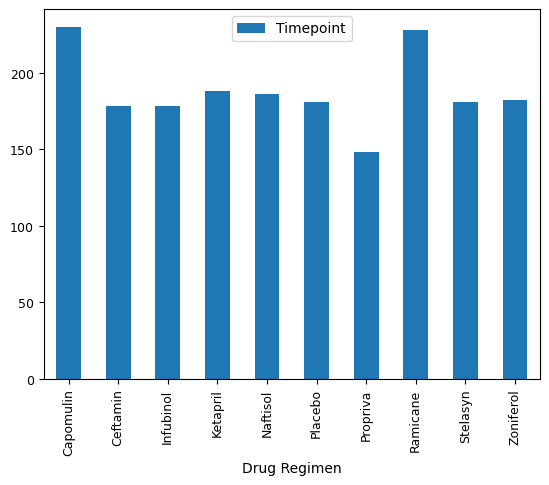

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bargraph = count_df.plot.bar(y = 'Timepoint', fontsize='9')

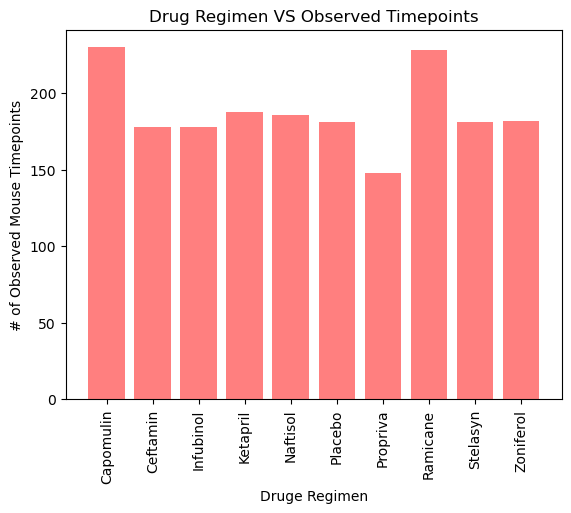

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
timepoints_num = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, timepoints_num, width = 0.8, color='r', alpha = 0.5, align="center")
plt.xticks(tick_locations, drugs, rotation="vertical")

plt.title("Drug Regimen VS Observed Timepoints")
plt.xlabel("Druge Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [42]:
clean_df.groupby("Sex").count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


<Axes: ylabel='Timepoint'>

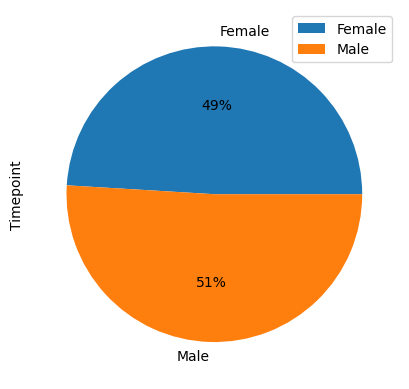

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

clean_df.groupby(['Sex']).count().plot(
    kind='pie', y='Timepoint', autopct='%1.0f%%')

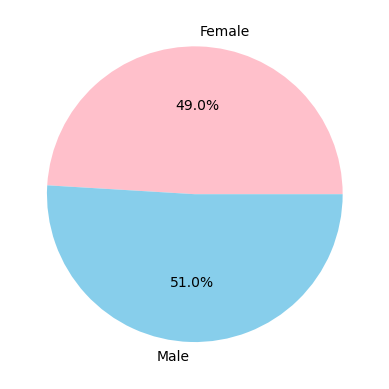

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#sex_df = pd.DataFrame({'Count': [922, 958]},index=['Female', 'Male'])
#sex_df.plot(kind='pie', subplots=True, figsize=(8, 8))
labels = ["Female", "Male"]
sizes = [922, 958]
colors = ["pink", "skyblue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%")
plt.show()



## Quartiles, Outliers and Boxplots

In [73]:
clean_df.loc[clean_df['Mouse ID'] == "b128"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint_df = clean_df.groupby(["Mouse ID", "Drug Regimen"], as_index=False)["Timepoint"].max()
final_timepoint_df.loc[final_timepoint_df['Mouse ID'] == "b128"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_volume_df = pd.merge(clean_df, final_timepoint_df, on=["Timepoint", "Mouse ID"])
final_timepoint_volume_df = final_timepoint_volume_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)",
                                                       "Drug Regimen_x"]]
                       
#final_timepoint_volume_df.rename(columns = {"Drug Regimen_x": "Treatment"})
final_timepoint_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen_x
0,b128,45,38.982878,Capomulin
1,f932,0,45.000000,Ketapril
2,g107,35,71.905117,Ketapril
3,a457,10,49.783419,Ketapril
4,c819,40,62.175705,Ketapril
...,...,...,...,...
243,t565,45,34.455298,Capomulin
244,i557,45,47.685963,Capomulin
245,m957,45,33.329098,Capomulin
246,f966,20,30.485985,Capomulin


In [134]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list_capomulin = []
tumor_list_ramicane = []
tumor_list_infubinol = []
tumor_list_ceftamin = []

for index, row in final_timepoint_volume_df.iterrows():
    match row['Drug Regimen_x']: 
        case "Capomulin":
            tumor_volume = row['Tumor Volume (mm3)']
            tumor_list_capomulin.append(tumor_volume)
        case "Ramicane":
            tumor_volume = row['Tumor Volume (mm3)']
            tumor_list_ramicane.append(tumor_volume)
        case "Infubinol":
            tumor_volume = row['Tumor Volume (mm3)']
            tumor_list_infubinol.append(tumor_volume)
        case "Ceftamin":
            tumor_volume = row['Tumor Volume (mm3)']
            tumor_list_ceftamin.append(tumor_volume)

#tumor_list_capomulin, tumor_list_ramicane, tumor_list_infubinol, tumor_list_ceftamin

#len(tumor_list_capomulin), len(tumor_list_ramicane), len(tumor_list_infubinol), len(tumor_list_ceftamin)
treatment_volume_df = pd.DataFrame({"Capomulin": tumor_list_capomulin,
                                   "Ramicane": tumor_list_ramicane,
                                   "Infubinol": tumor_list_infubinol,
                                   "Ceftamin": tumor_list_ceftamin})
treatment_volume_df


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.342008,36.321346,61.386660
1,38.753265,36.561652,72.226731,46.784535
2,32.377357,31.560470,46.250112,64.299830
3,23.343598,38.407618,57.031862,48.722078
4,38.939633,43.047543,67.685569,57.918381
5,28.484033,37.311236,66.196912,55.742829
6,41.483008,36.134852,62.117279,67.748662
7,40.728578,44.183451,55.629428,64.729837
8,46.539206,22.050126,62.754451,68.594745
9,31.023923,33.397653,65.525743,59.851956


In [138]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin = treatment_volume_df["Capomulin"]
quartiles_capo = capomulin.quantile([.25,.5,.75])
lowerq_capo = quartiles_capo[0.25]
upperq_capo = quartiles_capo[0.75]
iqr_capo = upperq_capo-lowerq_capo

ramicame = treatment_volume_df["Ramicane"]
quartiles_rami = ramicame.quantile([.25,.5,.75])
lowerq_rami = quartiles_rami[0.25]
upperq_rami = quartiles_rami[0.75]
iqr_rami = upperq_rami-lowerq_rami

infubinol = treatment_volume_df["Infubinol"]
quartiles_infu = infubinol.quantile([.25,.5,.75])
lowerq_infu = quartiles_infu[0.25]
upperq_infu = quartiles_infu[0.75]
iqr_infu = upperq_infu-lowerq_infu

ceftamin = treatment_volume_df["Ceftamin"]
quartiles_ceft = ceftamin.quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft
    
    
# Determine outliers using upper and lower bounds
lower_bound_capo = lowerq_capo - (1.5*iqr_capo)
upper_bound_capo = upperq_capo + (1.5*iqr_capo)

lower_bound_rami = lowerq_rami - (1.5*iqr_rami)
upper_bound_rami = upperq_rami + (1.5*iqr_rami)

lower_bound_infu = lowerq_infu - (1.5*iqr_infu)
upper_bound_infu = upperq_infu + (1.5*iqr_infu)

lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)
        

In [145]:
final_tumor_list_capomulin = []
final_tumor_list_ramicane = []
final_tumor_list_infubinol = []
final_tumor_list_ceftamin = []

for volume in tumor_list_capomulin:
    if (volume <= upper_bound_capo) & (volume >= lower_bound_capo):
        final_tumor_list_capomulin.append(volume)

for volume in tumor_list_ramicane:
    if (volume <= upper_bound_rami) & (volume >= lower_bound_rami):
        final_tumor_list_ramicane.append(volume)

for volume in tumor_list_infubinol:
    if (volume <= upper_bound_infu) & (volume >= lower_bound_infu):
        final_tumor_list_infubinol.append(volume)

for volume in tumor_list_ceftamin:
    if (volume <= upper_bound_ceft) & (volume >= lower_bound_ceft):
        final_tumor_list_ceftamin.append(volume)

len(final_tumor_list_capomulin), len(final_tumor_list_ramicane), len(final_tumor_list_infubinol), len(final_tumor_list_ceftamin)


(25, 25, 24, 25)

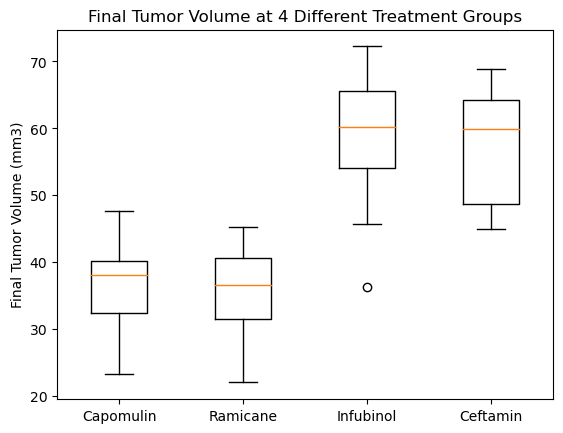

In [148]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume at 4 Different Treatment Groups')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(treatment_volume_df)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [149]:
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


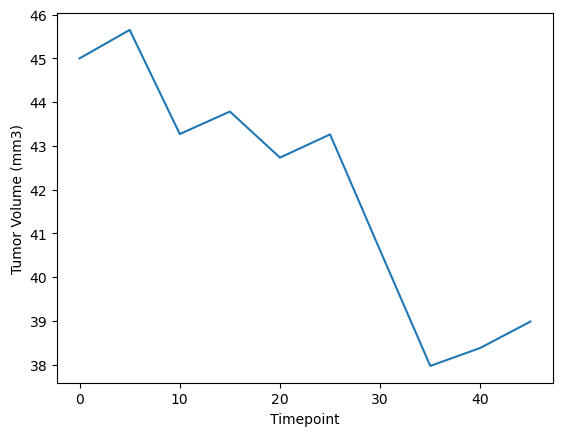

In [162]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
b128 = clean_df[clean_df["Mouse ID"] == "b128"]
b128

y_axis = b128["Tumor Volume (mm3)"]
x_axis = b128["Timepoint"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


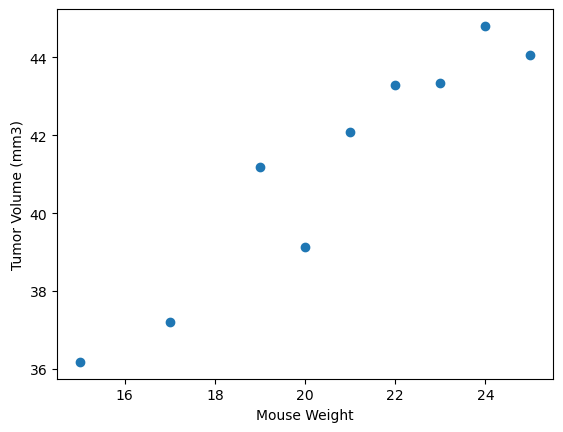

In [168]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
weight_volume = capo_df.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
weight = [15, 17, 19, 20, 21, 22, 23, 24, 25]
plt.scatter(weight,weight_volume)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between both factors is 0.95


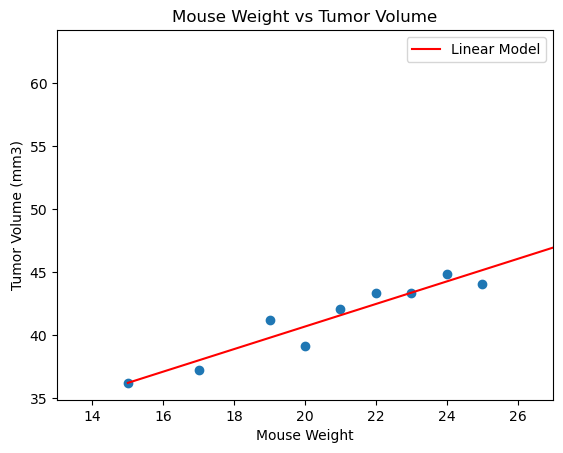

In [185]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_df = pd.DataFrame({"Weight": weight,
                              "Tumor Volume (mm3)": weight_volume})
correlation = st.pearsonr(weight, weight_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
coefficients = np.polyfit(correlation_df['Weight'].to_numpy(), correlation_df['Tumor Volume (mm3)'].to_numpy(), 1)
poly = np.poly1d(coefficients)


x_values = np.linspace(correlation_df["Weight"].min(), correlation_df["Tumor Volume (mm3)"].max(), 100)
y_values = poly(x_values)

# Plot the line of best fit
plt.scatter(correlation_df["Weight"],correlation_df["Tumor Volume (mm3)"])
plt.plot(x_values, y_values, color='red', label='Linear Model')

# Set plot labels and title
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Volume')
plt.xlim(13, 27) 

# Display the legend
plt.legend()

# Show the plot
plt.show()